# 1. Análisis Exploratorio de Datos

## Carga el dataset en un DataFrame de Pandas.

In [55]:
import pandas as pd
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [1]:
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

Saving olimpicos.csv to olimpicos.csv


## Muestra las primeras 5 filas y usa .info() para obtener información sobre los datos.

In [13]:
df.head()

,Atleta,Edad,Altura_cm,Peso_kg,Deporte,Entrenamientos_Semanales,Medallas_Totales,Pais
0,Usain Bolt,34,195,94,Atletismo,6,8,Jamaica
1,Simone Biles,26,142,47,Gimnasia,10,7,EE.UU.
2,Michael Phelps,35,193,88,Natación,9,23,EE.UU.
3,Katie Ledecky,27,183,70,Natación,8,10,EE.UU.
4,Nadia Comaneci,45,160,50,Gimnasia,7,5,Rumania


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Atleta                    7 non-null      object
 1   Edad                      7 non-null      int64 
 2   Altura_cm                 7 non-null      int64 
 3   Peso_kg                   7 non-null      int64 
 4   Deporte                   7 non-null      object
 5   Entrenamientos_Semanales  7 non-null      int64 
 6   Medallas_Totales          7 non-null      int64 
 7   Pais                      7 non-null      object
dtypes: int64(5), object(3)
memory usage: 580.0+ bytes


## Calcula estadísticas descriptivas con .describe().

In [5]:
df.describe(include="all")

,Atleta,Edad,Altura_cm,Peso_kg,Deporte,Entrenamientos_Semanales,Medallas_Totales,Pais
count,7,7.000000,7.000000,7.000000,7,7.000000,7.000000,7
unique,7,NaN,NaN,NaN,4,NaN,NaN,5
top,Usain Bolt,NaN,NaN,NaN,Atletismo,NaN,NaN,EE.UU.
freq,1,NaN,NaN,NaN,2,NaN,NaN,3
mean,NaN,35.000000,174.571429,68.428571,NaN,7.285714,8.571429,NaN
std,NaN,6.831301,18.715921,17.614929,NaN,1.799471,6.803361,NaN
min,NaN,26.000000,142.000000,47.000000,NaN,5.000000,3.000000,NaN
25%,NaN,30.500000,167.000000,57.500000,NaN,6.000000,4.500000,NaN
50%,NaN,35.000000,175.000000,65.000000,NaN,7.000000,7.000000,NaN
75%,NaN,39.000000,188.000000,79.000000,NaN,8.500000,9.000000,NaN


## Genera un histograma del número de entrenamientos semanales.

<Axes: xlabel='Entrenamientos_Semanales', ylabel='Count'>

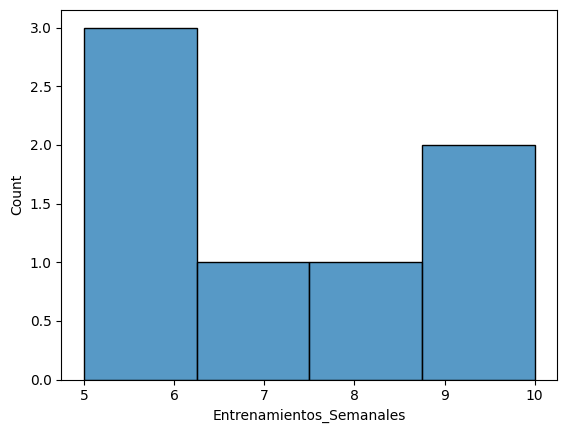

In [10]:
sns.histplot(df, x='Entrenamientos_Semanales')

# 2.  Estadística Descriptiva

## Determina el tipo de variable de cada columna.

In [14]:
df.dtypes

,0
Atleta,object
Edad,int64
Altura_cm,int64
Peso_kg,int64
Deporte,object
Entrenamientos_Semanales,int64
Medallas_Totales,int64
Pais,object


## Calcula la media, mediana y moda de la cantidad de medallas obtenidas.

In [23]:
df['Medallas_Totales'].mean()

np.float64(8.571428571428571)

In [24]:
df['Medallas_Totales'].median()

7.0

In [27]:
df['Medallas_Totales'].mode()

,Medallas_Totales
0,3
1,4
2,5
3,7
4,8
5,10
6,23


Nota: como los números de la serie "Medallas_Totales" son únicos, todos conforman la moda de la serie, al tener todos la misma frecuencia.

## Calcula la desviación estándar de la altura de los atletas.

In [29]:
df['Altura_cm'].std()

18.715921411614076

## Identifica valores atípicos en la columna de peso utilizando un boxplot.


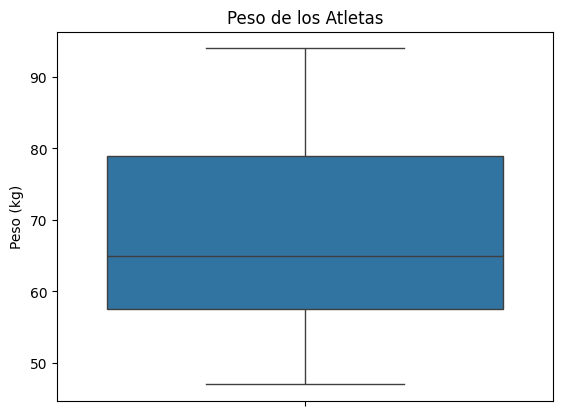

No hay valores outliers.


In [49]:
sns.boxplot(y=df['Peso_kg'])
plt.title('Peso de los Atletas')
plt.ylabel('Peso (kg)')
plt.show()

Q1 = df['Peso_kg'].quantile(0.25)
Q3 = df['Peso_kg'].quantile(0.75)
IQR = Q3 - Q1
inf = Q1 - 1.5 * IQR
sup = Q3 + 1.5 * IQR

if (df['Peso_kg'].min() >= inf) and (df['Peso_kg'].max() <= sup):
  print("No hay valores outliers.")
else:
  outliers = df[(df['Peso_kg'] < inf) | (df['Peso_kg'] > sup)]



# 3. Análisis de Correlación

## Calcula la correlación de Pearson entre entrenamientos semanales y medallas totales.

In [48]:
df['Entrenamientos_Semanales'].corr(df['Medallas_Totales'])

np.float64(0.5698362008613984)

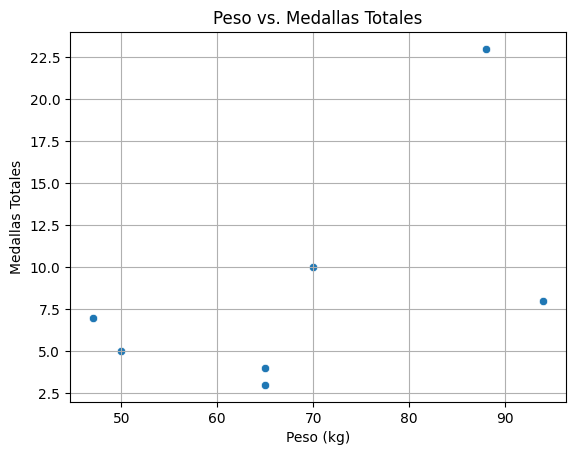

In [52]:
sns.scatterplot(x='Peso_kg', y='Medallas_Totales', data=df)
plt.title('Peso vs. Medallas Totales')
plt.xlabel('Peso (kg)')
plt.ylabel('Medallas Totales')
plt.grid()
plt.show()

## Explica si existe correlación entre estas variables.

Existe una correlación positiva moderada (Corr pearson = 0.57), pero parece no ser suficiente para asegurar una mayor tasa de éxito a mayor peso del deportista. Mas aún cuando sería esperable que la correlación mejore al aislar a los deportistas por deporte y calcular la correlación de cada deporte. El dataset de 7 filas lamentablemente dificulta hacer esto.

# 4. Regresión Lineal

## Implementa un modelo de regresión lineal para predecir el número de medallas obtenidas en función del número de entrenamientos semanales

In [68]:
modelo = smf.ols(formula='Medallas_Totales ~ Entrenamientos_Semanales', data=df)
resultado = modelo.fit()
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:       Medallas_Totales   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     2.404
Date:                Wed, 09 Jul 2025   Prob (F-statistic):              0.182
Time:                        22:45:59   Log-Likelihood:                -21.441
No. Observations:                   7   AIC:                             46.88
Df Residuals:                       5   BIC:                             46.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


## Obtén los coeficientes de regresión e interpreta el resultado.

Nuestro modelo arroja que:
$$ MedallasTotales = -7.125 + 2.1544 \cdot EntrenamientosSemanales $$

Se obtiene un $R^2$ y un $R^2_{aj}$ de 0,33 y 0,19. Coeficientes muy débiles de correlación. Esto último es reforzado por la prueba estadística $p > |t|$, donde ambos pruebas son muy superiores a $0.05$, de lo que se presume que el modelo completo no es estadísticamente significativo.

## Calcula el R² para medir el ajuste del modelo.

In [70]:
resultado.rsquared

np.float64(0.32471329581215214)

## Usa Seaborn (regplot) para graficar la regresión lineal.

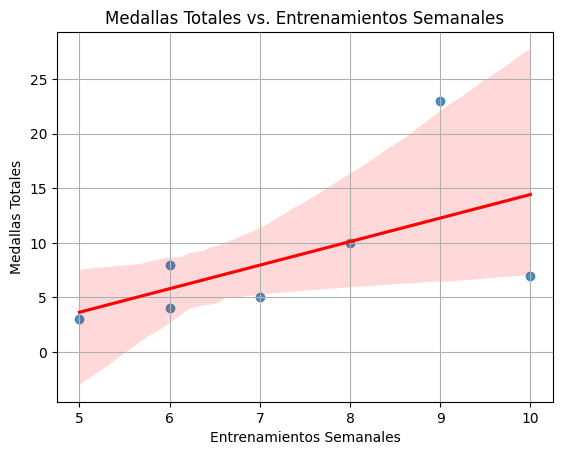

In [91]:
sns.regplot(x='Entrenamientos_Semanales', y='Medallas_Totales', data=df, line_kws={'color':'red'})
plt.title('Medallas Totales vs. Entrenamientos Semanales')
plt.xlabel('Entrenamientos Semanales')
plt.ylabel('Medallas Totales')
plt.grid()
plt.show()

# 5. Visualización de Datos con Seaborn y Matplotlib

## Crea un heatmap de correlación entre todas las variables numéricas

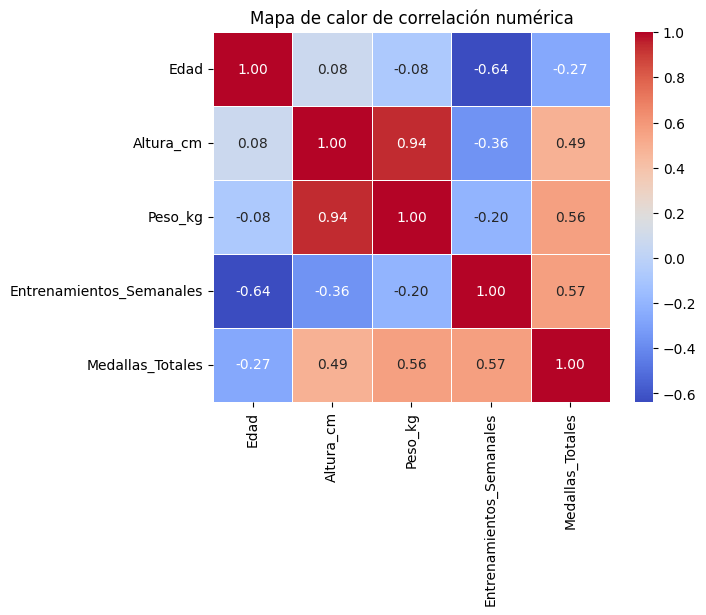

In [90]:
df_limpio = df.select_dtypes(include=['int64', 'float64'])
matriz_corr = df_limpio.corr()
matriz_corr

sns.heatmap(matriz_corr,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            linewidths=.5)
plt.title('Mapa de calor de correlación numérica')
plt.show()

## Crea un boxplot de la cantidad de medallas por disciplina deportiva

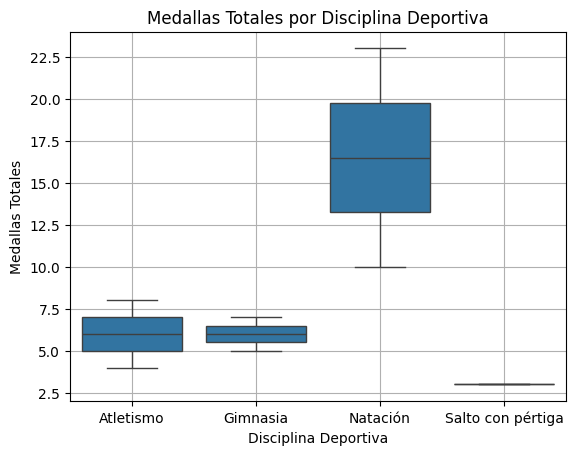

In [87]:
sns.boxplot(x='Deporte', y='Medallas_Totales', data=df)
plt.title('Medallas Totales por Disciplina Deportiva')
plt.xlabel('Disciplina Deportiva')
plt.ylabel('Medallas Totales')
plt.grid()
plt.show()

## Personaliza los gráficos con títulos, etiquetas y colores

Hecho.